# Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [3]:
sales_df = pd.read_csv('../Datasets/gala_sales.csv')

# Understanding the data

In [4]:
sales_df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
sales_df.tail()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash
7828,7828,afd70b4f-ee21-402d-8d8f-0d9e13c2bea6,2022-03-06 13:50:36,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,non-member,14.99,4,59.96,debit card


# Gathering the general information about dataset like total number of rows & columns, columns name, missing values, data type of each column, ect.

In [6]:
sales_df.shape

(7829, 10)

In [7]:
sales_df.columns

Index(['Unnamed: 0', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

# here the column name 'Unnamed: 0' is nothing but index number and as we are using the pandas we don't need this column

In [8]:
sales_df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [10]:
sales_df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

# Statistical measurements

In [11]:
sales_df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


# Checking for unique values for each column

In [12]:
sales_df.nunique()

transaction_id    7829
timestamp         7738
product_id         300
category            22
customer_type        5
unit_price          64
quantity             4
total              256
payment_type         4
dtype: int64

# Exploring some of the columns in deep

list if unique categories

In [13]:
sales_df.category.unique()

array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
       'spices and herbs', 'canned foods', 'packaged foods',
       'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
       'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
       'pets', 'personal care', 'medicine', 'kitchen',
       'cleaning products'], dtype=object)

counting total of each type of the category

In [14]:
sales_df.category.value_counts()

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64

list of unique customer type

In [15]:
sales_df.customer_type.unique()

array(['gold', 'standard', 'premium', 'basic', 'non-member'], dtype=object)

total unique count of each type

In [16]:
sales_df.customer_type.value_counts()

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64

list of unique payment type used by the customers

In [17]:
sales_df.payment_type.unique()

array(['e-wallet', 'debit card', 'cash', 'credit card'], dtype=object)

total count of each type

In [18]:
sales_df.payment_type.value_counts()

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64

# Relationship Analysis

In [19]:
new_sales_df = sales_df.drop(columns=['transaction_id', 'timestamp', 'product_id', 'category',
                          'customer_type', 'payment_type'])

<Axes: >

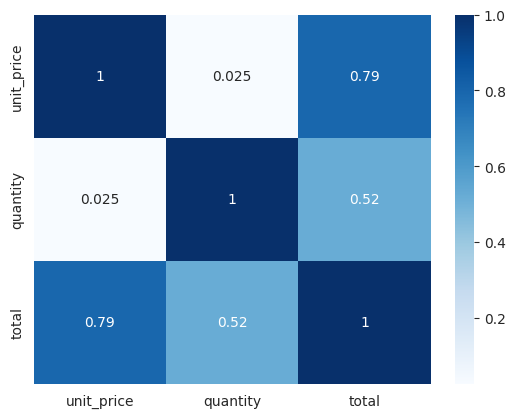

In [20]:
sns.heatmap(new_sales_df.corr(), cmap='Blues', annot=True)

The above figure is heatmap which shows the co-relation between each variable/columns.
The range to measure the co-relation is 0 to 1. 1 shows the strongest co-relation, the column with itself always has co-relation 1.
The value in the dark colour shows very positive co-relation.If you increase unit_price there will be no change in quantity.
The value 0.52 shows the moderate co-relation between quantity-total. And the value 0.79 show the very good co-relation between unit_price-total, as unit_price will increase the total will also increase.

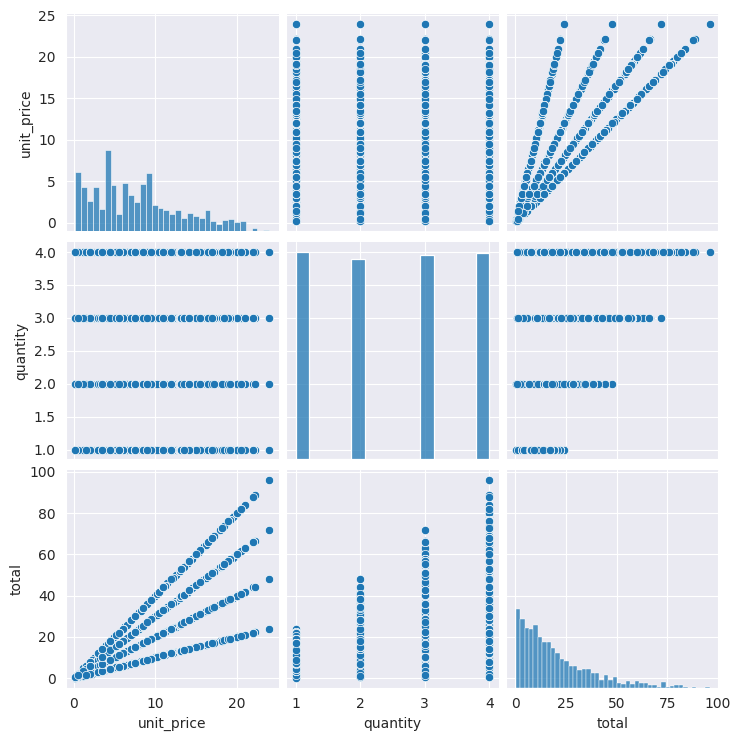

In [21]:
sns.pairplot(sales_df)

The above given is a pairplot, a powerful visualization tool to understand the relationships between multiple variables in a dataset.
1. Diagonal Plots: The diagonal plots represent the distribution of individual variables using histograms. For example, unit_price has a distribution shown in the top-left histogram, quantity in the middle, and total in the bottom-right.

2. Scatter Plots: The plots below and to the left of the diagonal are scatter plots that show the relationships between pairs of variables. For instance, the bottom-left scatter plot shows the relationship between unit_price and total, indicating a positive correlation where higher unit prices are generally associated with higher totals. The scatter plot in the middle column of the bottom row shows the relationship between quantity and total, which seems to show a pattern of increasing total 
with quantity, but the distribution appears more segmented, likely due to discrete quantities.

3. Symmetry: The pairplot is symmetrical; the plot in the row quantity and column unit_price is the same as the plot in the row unit_price and column quantity.

4. Trends and Patterns: The plot of quantity vs. unit_price shows that quantities tend to be grouped at specific levels (discrete values), and there is no clear trend between these variables. The total vs. unit_price plot shows a clear linear relationship, indicating that as the unit price increases, the total also tends to increase.

# Below given is the visual of the total count of each customer_type.

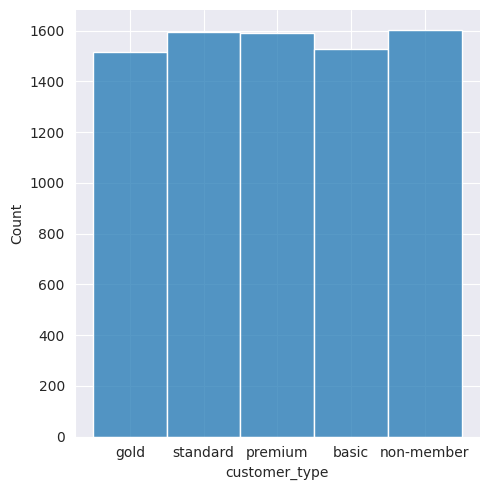

In [22]:
sns.displot(sales_df.customer_type)

# Below given is the visual of the total count of each payment_type.

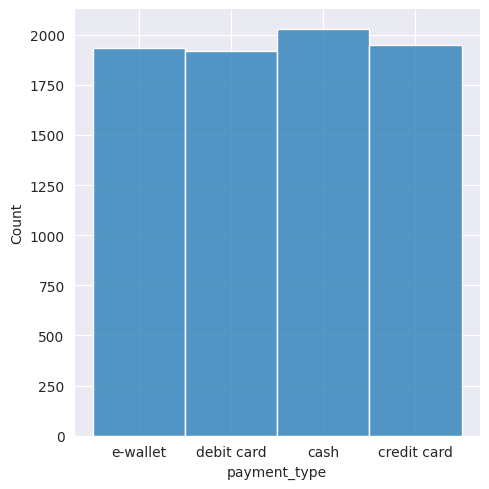

In [23]:
sns.displot(sales_df.payment_type)

# Below given is the visual of each quantity sold of each category.

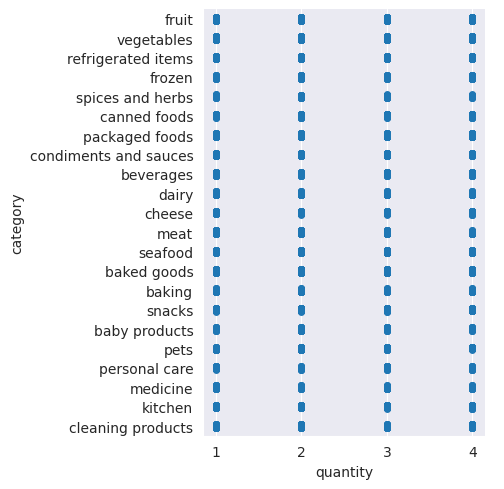

In [24]:
sns.catplot(x='quantity', y='category', data=sales_df)

# You can compare unit prices within each category across different payment types and customer types.

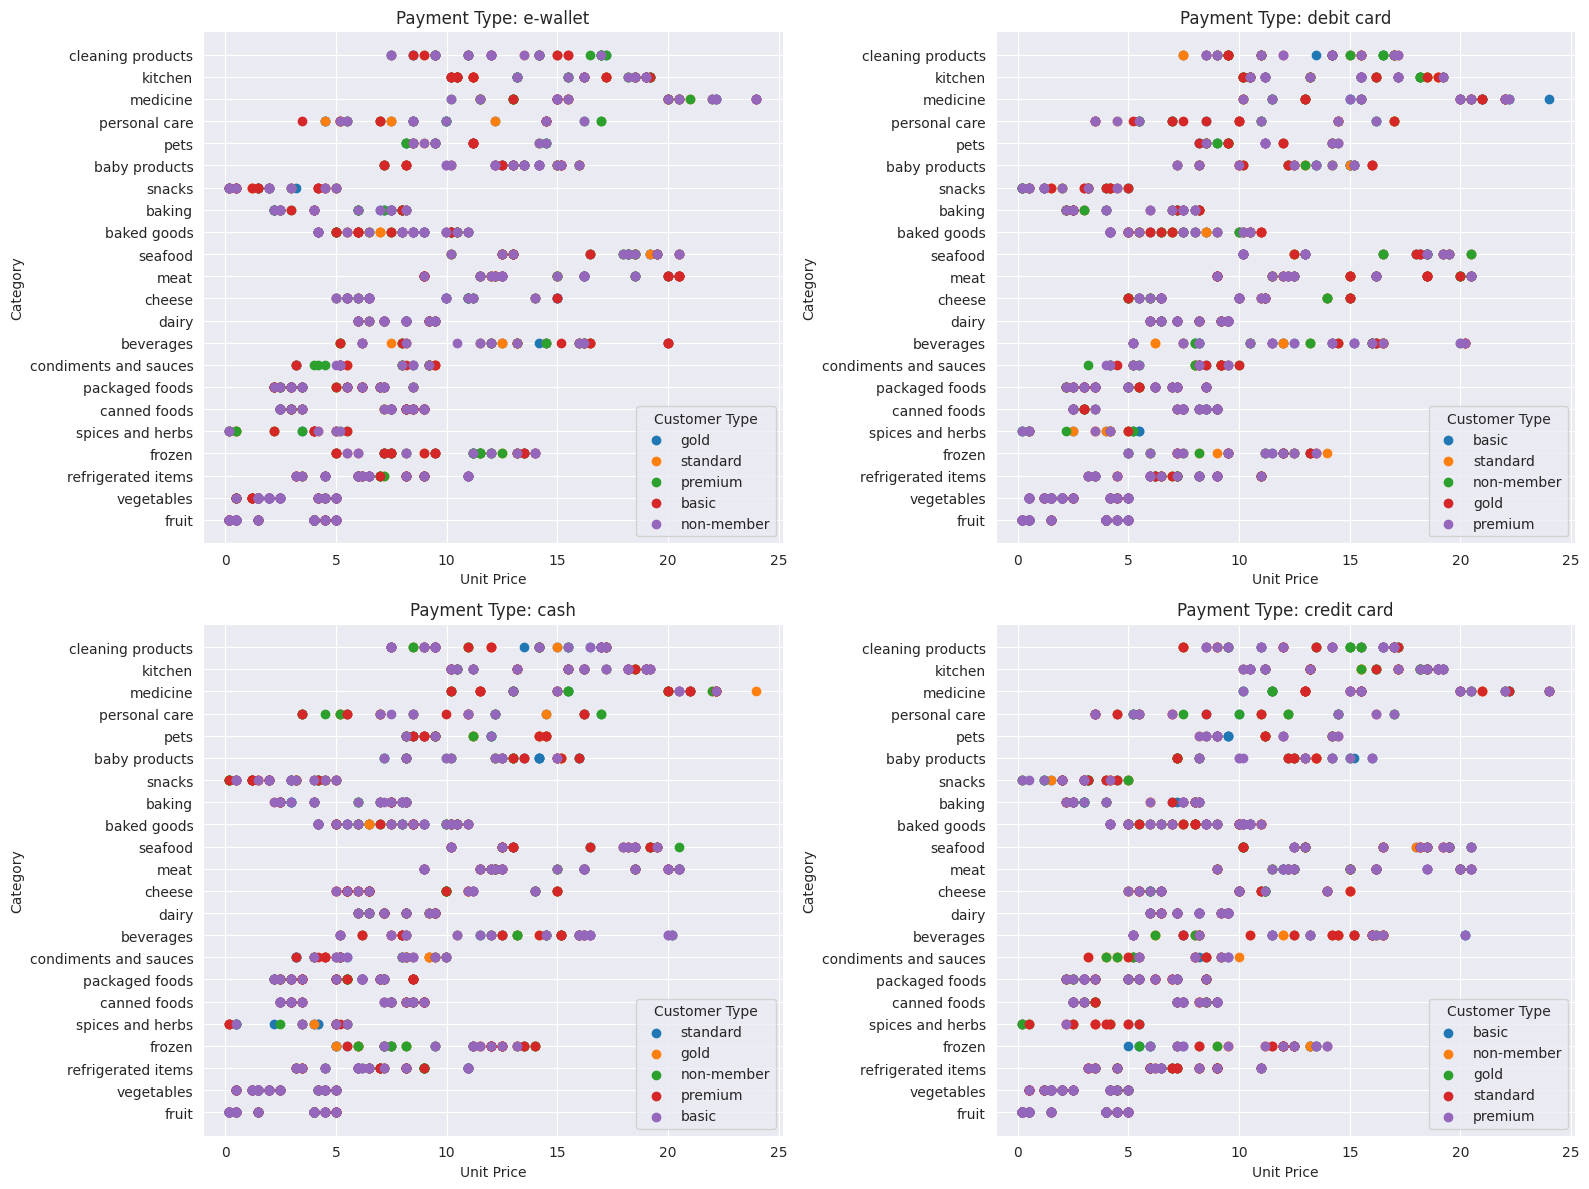

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
for i, payment_type in enumerate(sales_df['payment_type'].unique()):
    subset = sales_df[sales_df['payment_type'] == payment_type]

    for customer_type in subset['customer_type'].unique():
        subset_customer = subset[subset['customer_type'] == customer_type]
        ax = axes[i // 2, i % 2]  # Position subplot in the grid
        ax.scatter(subset_customer['unit_price'], subset_customer['category'], label=customer_type)
        ax.set_title(f'Payment Type: {payment_type}')
        ax.set_xlabel('Unit Price')
        ax.set_ylabel('Category')
        ax.legend(title='Customer Type')
plt.tight_layout()
plt.show()

# The information we have is not as much as we want to make further analysis. So Gala Groceries provided more data to find the solution for their problem. All the points are discussed in below given information.

# Title: Strategic Plan for Predicting Stock Levels

Objective: To accurately predict stock levels using sales and sensor data.

1) Data Sources:
* Sales Data: Historical sales trends.
* Sensor Storage Temperature Data: Impact of storage conditions.
* Sensor Stock Levels Data: Real-time stock estimates.

2) Strategic Plan:
* Data Integration: Merge datasets using common columns (timestamps, product IDs).
* Feature Engineering: Create features like hourly sales, temperature variations, and stock level changes.
* Model Selection: Time series analysis or regression models for predictions.
* Validation: Split data into training and test sets for accuracy checks.
* Implementation: Deploy model for real-time stock level predictions and integrate with procurement.

3) Expected Outcomes:
* Accurate hourly stock level predictions.
* Optimized procurement processes.
* Reduced stockouts and overstock situations.

# Loading two more datasets

In [26]:
stock_df = pd.read_csv('../Datasets/gala_stock_levels.csv')
temp_df = pd.read_csv('../Datasets/gala_storage_temperature.csv')

In [27]:
stock_df.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [28]:
stock_df.tail()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
14995,14995,b9bf6788-09f3-490b-959b-dc5b55edb4b6,2022-03-04 10:52:50,e37658de-3649-4ddb-9c73-b868dd69d3fe,0.66
14996,14996,9ff1cc01-020f-491a-bafd-13552dccff44,2022-03-02 12:25:48,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0.99
14997,14997,4d8101de-e8a2-4af9-9764-7a3a22aa7084,2022-03-03 17:36:44,8e21dcec-d775-4969-8334-05a37a5fd189,0.72
14998,14998,5f2a7b1e-b3c4-4395-8425-c960e22f701d,2022-03-02 19:42:47,9708cf5b-aa69-4320-a013-9d234c40e63f,0.95
14999,14999,af6f4493-e49d-4dcb-951d-308e6cce267b,2022-03-06 17:18:27,3bc6c1ea-0198-46de-9ffd-514ae3338713,0.75


In [29]:
temp_df.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [30]:
temp_df.tail()

,Unnamed: 0,id,timestamp,temperature
23885,23885,17bcff56-9965-4e9f-ad5f-107f0f3be93f,2022-03-01 10:40:43,-1.46
23886,23886,51d4eb44-04bd-4d6a-b777-0653bc173303,2022-03-05 17:07:49,-19.37
23887,23887,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,2022-03-01 16:15:41,-2.89
23888,23888,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,2022-03-07 14:44:52,-2.56
23889,23889,589c28e1-f1f3-4efb-af6d-9f194c4d7d5b,2022-03-01 16:33:41,0.13


# Checking if data cleaning id needed or not

In [31]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15000 non-null  int64  
 1   id                   15000 non-null  object 
 2   timestamp            15000 non-null  object 
 3   product_id           15000 non-null  object 
 4   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 586.1+ KB


In [32]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   23890 non-null  int64  
 1   id           23890 non-null  object 
 2   timestamp    23890 non-null  object 
 3   temperature  23890 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 746.7+ KB


In [33]:
stock_df.drop(columns=['Unnamed: 0'], inplace=True)
temp_df.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:
stock_df.columns

Index(['id', 'timestamp', 'product_id', 'estimated_stock_pct'], dtype='object')

In [35]:
temp_df.columns

Index(['id', 'timestamp', 'temperature'], dtype='object')

# As we want to predict stick on hourly bases we have to convert the datatype of the timestamp to 'datetime' dtype.

In [36]:
sales_df['timestamp'] = pd.to_datetime(sales_df.timestamp, format='%Y-%m-%d %H:%M:%S')

In [37]:
stock_df.timestamp = pd.to_datetime(stock_df.timestamp, format='%Y-%m-%d %H:%M:%S')

In [38]:
temp_df.timestamp = pd.to_datetime(temp_df.timestamp, format='%Y-%m-%d %H:%M:%S')

In [39]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [40]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [41]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.1+ KB


In [42]:
sales_df.timestamp = sales_df.timestamp.dt.round('h')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 10:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 11:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 15:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [43]:
stock_df.timestamp = stock_df.timestamp.dt.round('h')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 17:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 14:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [44]:
temp_df.timestamp = temp_df.timestamp.dt.round('h')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 16:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 13:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [45]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,3
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,8


In [46]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92


In [47]:
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.192988
1,2022-03-01 10:00:00,1.695658
2,2022-03-01 11:00:00,-0.794536
3,2022-03-01 12:00:00,-0.026962
4,2022-03-01 13:00:00,-0.553366


In [48]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92,NaN


In [49]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.192988
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.192988
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.192988
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.192988
4,2022-03-01 09:00:00,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92,NaN,-0.192988


In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11025 entries, 0 to 11024
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            11025 non-null  datetime64[ns]
 1   product_id           11025 non-null  object        
 2   estimated_stock_pct  11025 non-null  float64       
 3   quantity             2972 non-null   float64       
 4   temperature          11025 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 430.8+ KB


In [51]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11025 entries, 0 to 11024
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            11025 non-null  datetime64[ns]
 1   product_id           11025 non-null  object        
 2   estimated_stock_pct  11025 non-null  float64       
 3   quantity             11025 non-null  float64       
 4   temperature          11025 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 430.8+ KB


In [52]:
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [53]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.192988,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.192988,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.192988,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.192988,beverages
4,2022-03-01 09:00:00,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92,0.0,-0.192988,spices and herbs


In [54]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.192988,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.192988,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.192988,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.192988,beverages,20.19
4,2022-03-01 09:00:00,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92,0.0,-0.192988,spices and herbs,4.99


In [55]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11025 entries, 0 to 11024
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            11025 non-null  datetime64[ns]
 1   product_id           11025 non-null  object        
 2   estimated_stock_pct  11025 non-null  float64       
 3   quantity             11025 non-null  float64       
 4   temperature          11025 non-null  float64       
 5   category             11025 non-null  object        
 6   unit_price           11025 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 603.1+ KB


# Feature Engineering

In [56]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.192988,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.192988,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.192988,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.192988,beverages,20.19,1,1,9
4,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92,0.0,-0.192988,spices and herbs,4.99,1,1,9


In [57]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.192988,11.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.192988,1.49,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,True
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.192988,14.19,1,1,9,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.192988,20.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92,0.0,-0.192988,4.99,1,1,9,False,False,...,False,False,False,False,False,False,False,False,True,False


In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11025 entries, 0 to 11024
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      11025 non-null  object 
 1   estimated_stock_pct             11025 non-null  float64
 2   quantity                        11025 non-null  float64
 3   temperature                     11025 non-null  float64
 4   unit_price                      11025 non-null  float64
 5   timestamp_day_of_month          11025 non-null  int32  
 6   timestamp_day_of_week           11025 non-null  int32  
 7   timestamp_hour                  11025 non-null  int32  
 8   category_baby products          11025 non-null  bool   
 9   category_baked goods            11025 non-null  bool   
 10  category_baking                 11025 non-null  bool   
 11  category_beverages              11025 non-null  bool   
 12  category_canned foods           

In [59]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.192988,11.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.14,3.0,-0.192988,1.49,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.67,0.0,-0.192988,14.19,1,1,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.82,0.0,-0.192988,20.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.92,0.0,-0.192988,4.99,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# Modelling

In [60]:
X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(11025, 28)
(11025,)


In [61]:
K = 10
split = 0.75

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [63]:
accuracy = []

for fold in range(0, K):

    # Instantiate algorithm
    model = RandomForestRegressor()
    scaler = StandardScaler()

    # Create training and test samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

    # Scale X data, we scale the data because it helps the algorithm to converge
    # and helps the algorithm to not be greedy with large values
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model
    trained_model = model.fit(X_train, y_train)

    # Generate predictions on test sample
    y_pred = trained_model.predict(X_test)

    # Compute accuracy, using mean absolute error
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    accuracy.append(mae)
    print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.234
Fold 2: MAE = 0.234
Fold 3: MAE = 0.236
Fold 4: MAE = 0.235
Fold 5: MAE = 0.236
Fold 6: MAE = 0.235
Fold 7: MAE = 0.235
Fold 8: MAE = 0.235
Fold 9: MAE = 0.234
Fold 10: MAE = 0.235
Average MAE: 0.23


In [64]:
import matplotlib.pyplot as plt
import numpy as np

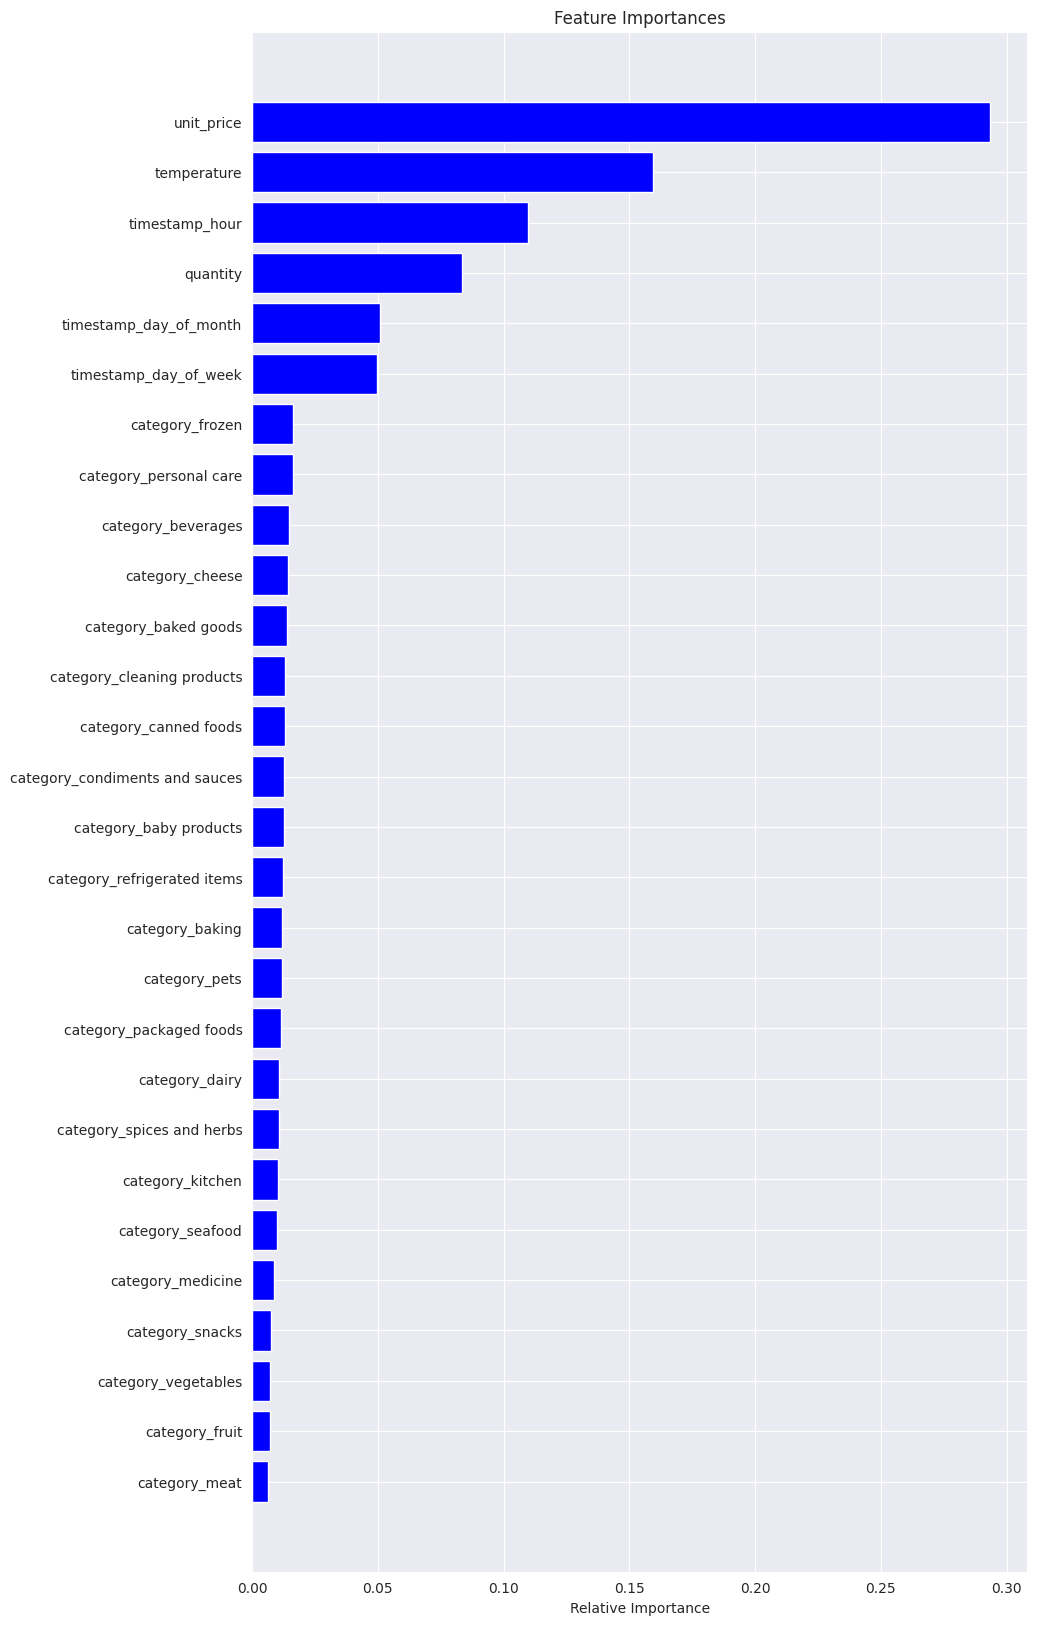

In [65]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This feature importance visualisation tells us:

- The product categories were not that important
- The unit price and temperature were important in predicting stock
- The hour of day was also important for predicting stock

With these insights, we can now report this back to the business